# ProMI Exercise Sheet 1: Basic Probabilities & Information Theory

The first exercise sheet is about the basics of probabilities and information theory.
The exercises are a mix of theoretical questions and practical coding exercises.

For the coding exercises, we will use Python as our main programming language and rely on the NumPy and Matplotlib packages.
If you are not familiar with Python, Jupyter Notebooks, NumPy, or Matplotlib, we recommend you go through the following tutorial before starting with the exercises: https://cs231n.github.io/python-numpy-tutorial/.

The theoretical questions can be answered by adding your answers in the markdown cells and using LaTeX to write down the mathematical formulas.
Wrap your LaTeX formulas with a dollar sign, like this: `$ f(x) = 2 $` or `$$ f(x) = 2 $$` for a formula on a new line.
These would show as $ f(x) = 2 $ and $$ f(x) = 2 $$
You can double-click on a markdown cell to edit it.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import geom

In [ ]:
def test_true(test_name, value: bool):
    if value:
        #print("\033[92mTest {}: passed.\033[0m".format(test_name))
        print(f'Test {test_name}: passed.')
    else:
        #print("\033[91mTest {}: failed.\033[0m".format(test_name))
        print(f'Test {test_name}: failed.')

# equality
def test_almost_equal(test_name, value: float, target: float, precision: float = 1e-4):
    test_true(test_name, abs(value - target) < precision)

# almost equal
def test_almost_zero(test_name, value: float, precision: float = 1e-4):
    test_almost_equal(test_name, value, 0.0, precision=precision)

def test_almost_equal_array(test_name, value: np.ndarray, target: np.ndarray, precision: float = 1e-4):
    test_true(test_name, np.all(np.abs(value - target) < precision))

# Part 1: Basic Probabilities

## Question 1.1: Bonferroni Inequality

Let $A$ and $B$ be two events in a probability space. Prove the following inequality (known as the Bonferroni inequality):
$$ P(A, B) \geq P(A) + P(B) - 1 $$

#### YOUR SOLUTION HERE:
$$ P (A \cup B) = P(A) + P(B) - P(A \cap B) $$
$$ P (A \cup B) \geq P(A \cap B) $$
$$ 1 \geq P (A \cup B) \geq P(A \cap B) $$
$$ 1 \geq P(A) + P(B) - P(A \cap B) $$
$$ P (A \cap B) \geq P(A) + P(B) - 1 $$
$$ P(A, B) \geq P(A) + P(B) - 1 $$


## Question 1.2: Simple Probability Density Functions

The PDF of a random variable $X$ is given by:
$$f(x) = 
\begin{cases} 
c(2 - 2x^2) & \text{for } -1 < x < 1 \\ 
0 & \text{otherwise} 
\end{cases}$$

### 1. Find the value of $c$.

#### YOUR SOLUTION HERE:

$$ \int_{-\infty}^{\infty} f(x) \, dx = 1 $$
$$ \int_{-1}^{1} c (2 - 2x ^ 2) \, dx = 1 $$
$$ = c \int_{-1}^{1} (2 - 2x ^ 2) \, dx $$
$$ = c \left(\int_{-1}^{1} 2 \, dx - \int_{-1}^{1} 2x^2 \, dx \right) $$
$$ = c \left( \left[ 2x \right] _ {-1}^{1} - \left[ \frac{2}{3} x^3 \right] _ {-1}^{1} \right) $$
$$ = c \left( 2 - \left( -2 \right) - \left( \frac{2}{3} - \left( - \frac{2}{3} \right) \right) \right) $$
$$ = c \left( 4 - \frac{4}{3} \right) $$
$$ $$
$$ c \left( \frac{8}{3} \right) = 1 $$
$$ c = \frac{1}{ \frac{8}{3} } = \frac{3}{8} $$




### 2. Compute the expected value $E[X]$.

#### YOUR SOLUTION HERE:

$$ E [ X ] = \int_{x \in X }{} x f(x) \, dx $$
$$ = \int_{-1}^{1} x \frac{3}{8} \left( 2 - 2x^2 \right) \, dx $$
$$ = \frac{3}{8} \int_{-1}^{1} 2x - 2x^3 \, dx $$
$$ = \frac{3}{8} \left( \int_{-1}^{1} 2x \, dx - \int_{-1}^{1} 2x^3 \, dx \right)$$
$$ = \frac{3}{8} \left( \left[ x^2 \right] _{-1}^{1} - \left[ \frac{1}{2} x^4 \right] _{-1}^{1} \right)$$
$$ = 0 $$


### 3. What is the CDF of $X$?

#### YOUR SOLUTION HERE:

$$ F _ { X } ( x ) = P ( X \leq x ) = \int _ { - \infty } ^ { x } \rho ( x ^ { \prime } ) d x ^ { \prime } $$
$$ F _ { X } ( x ) = \int _ { - 1 } ^ { x } \frac { 3 } { 8 } ( 2 - 2 t ^ { 2 } ) d t $$
$$ = \frac { 3 } { 8 } \left( \int _ { - 1 } ^ { x } d t - \int _ { - 1 } ^ { x } 2 t ^ { 2 } d t \right) $$
$$ = \frac { 3 } { 8 } \left( [ 2 t ] _{-1}^{x} - \left[ \frac { 2 } { 3 } t ^ { 3 } \right] _{-1} ^ {x} \right) $$
$$ = \frac { 3 } { 8 } \left( 2 ( x + 1 ) - \frac { 2 } { 3 } ( x ^ { 3 } + 1 ) \right) $$
$$ = \frac { 3 } { 4 } x + \frac { 3 } { 4 } - \frac { 1 } { 4 } x ^ { 3 } - \frac { 1 } { 4 } $$
$$ F _ { X } ( x ) = - \frac { 1 } { 4 } x ^ { 3 } + \frac { 3 } { 4 } x + \frac { 1 } { 2 } $$

$$F_{X}(x) =
\begin{cases}
0 & \text{for } x < -1 \\
- \frac { 1 } { 4 } x ^ { 3 } + \frac { 3 } { 4 } x + \frac { 1 } { 2 } & \text{for } -1 \leq x \leq 1 \\
1 & \text{for } x > 1
\end{cases}$$

### 4. (Coding) Plot the PDF and CDF of $X$

In [6]:
def pdf(x):
    if -1 < x < 1:
        return (3 / 8) * (2 - 2 * (x ** 2))
    else:
        return 0

def cdf(x):
    if x < -1:
        return 0
    elif x > 1:
        return 1
    else:
        return (-1 / 4) * (x ** 3) + (3 / 4) * x + (1 / 2)

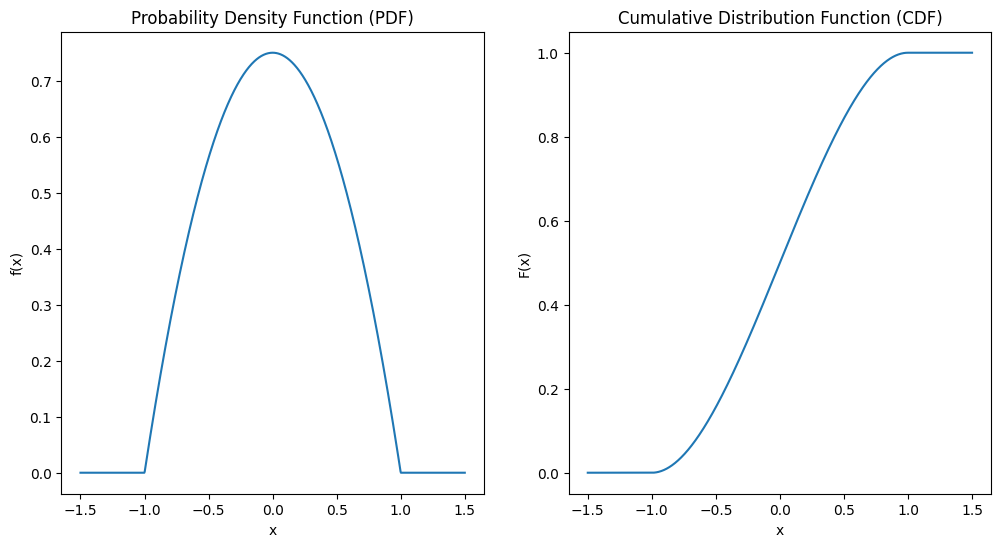

In [7]:
xs = np.linspace(-1.5, 1.5, 1000)

pdf_values = [pdf(x) for x in xs]
cdf_values = [cdf(x) for x in xs]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(xs, pdf_values, label='PDF')
plt.title('Probability Density Function (PDF)')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.subplot(1, 2, 2)
plt.plot(xs, cdf_values, label='CDF')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()

## Question 1.3: Morgan's Law
Let $E_1$ and $E_2$ are mutually independent events. Show that $\bar{E}_1$ and $\bar{E}_2$ are also mutually indepent. Remark Morgan's law: $p(\bar{A}\bar{B}) = p(\overline{A + B})$

#### YOUR SOLUTION HERE:

Two events are independent when:
$$ P({E}_1 \cap {E}_2) = P({E}_1)P({E}_2) $$

Now we check if $ P(\bar{E}_1 \cap \bar{E}_2) = \bar P(\bar{E}_1)P(\bar{E}_2) $ is valid. Assumings that  $ E_1 $ and $ E_2 $ are independent too.

$$ P ( \bar{E}_1 \cap \bar{E}_2 ) = P (\overline{E_1 \cup E_2}) = 1 - P ( E_1 \cup E_2 )$$
$$ = 1 - \left( P ( E_1 ) + P ( E_2 ) - P ( E_1 \cap E_2 ) \right) $$
$$ = 1 - P ( E_1 ) - P ( E_2 ) + P ( E_1 )  P ( E_2 ) = $$
$$ P ( \bar E_1 \cap \bar E_2 ) = (1 - P( E_1 ) ) ( 1 - P ( E_2 ) ) = $$
$ P ( \bar E_1 \cap \bar E_2 ) = P ( \bar E_1 ) P ( \bar E_2 ) \Rightarrow \bar E_1$ and $\bar E_2$ are independent from each other

## Question 1.4: LRU Technique 

Consider a system that cache files using a Least Recently Used (LRU) technique. In this system, the probability of requesting a popular file is $p(P) = 0.10$. If a cache's update happens, the probability of requesting a popular file is $p(P|U) = 0.20$. However, if no update has happened, the probability is only $p(P | \bar{U}) = 0.05$. Find:

### 1. The probability of an update $p(U)$.

#### YOUR SOLUTION HERE:

$$ p ( P ) = p ( P \cap U ) + p ( P \cap \bar U ) $$
$$ p ( P ) = p ( P | U ) p ( U ) + p ( P | \bar U ) p ( \bar U ) $$
$$ 0.10 = 0.20 p ( U ) + 0.05 p ( \bar U ) $$
$$ 0.10 = 0.20 p ( U ) + 0.05 (1 - p(U)) $$
$$ 0.10 = 0.20 p ( U ) + 0.05 - 0.05p(U)) $$
$$ 0.05 = 0.15 p(U) $$
$$ p(U) = \frac {0.05}{0.15} $$
$$ p(U) = \frac {1}{3} $$

### 2. The probability of an update given a popular file was requested $p(U|P)$.

#### YOUR SOLUTION HERE:

$$ p(U|P) = \frac {p(P|U)p(U)}{p(P)} $$
$$ = \frac {0.20 \cdot \frac {1}{3}}{0.10} $$
$$ = \frac {\frac {1}{5} \cdot \frac {1}{3}}{\frac {1}{10}} $$
$$ = \frac {\frac {1}{15}}{\frac {1}{10}} $$
$$ = \frac {10}{15} $$
$$ = \frac {2}{3} $$

## Question 1.5: Independence

Due to variations in the distance from Earth, the arrival time of daily updates of a robot on Mars follows a uniform distribution between 7 AM and 8 AM. Based on the events $A = \text{update has not arrived by 7:30 AM}$ and $B = \text{update has arrived by 7:31 AM}$. (Test)

### 1. Are A and B independent? Prove your answer.

#### YOUR SOLUTION HERE:
They are not independent:
\begin{gather*}
p(A) = \frac{1}{2} \\
p(B) = \frac{31}{60} - p(A) = \frac{1}{60} \\
p(A ∩ B) = p(A)p(B) \\
p(A ∩ B) = 0 \\
0 \neq 1/2 * 1/60 \\
\end{gather*}


### 2. Find:
$p(B|A)$

#### YOUR SOLUTION HERE:
\begin{gather*}
p(B|A) = \frac{p(A \cap B)}{p(A)} \\
p(B|A) = \frac{0}{0,5} = 0
\end{gather*}

### 2. Find:
$p(A|B)$

#### YOUR SOLUTION HERE:
\begin{gather*}
p(A|B) = \frac{p(A \cap B)}{p(B)} \\
p(A|B) = \frac{0}{\frac{1}{60}} = 0
\end{gather*}

## Question 1.6: Probability Density Function

Consider the random variable $X$ with pdf $f(x)$ given by:
$$f(x) = 
\begin{cases}
a(1+x), & -1 < x \leq 0 \\
a(1-x), & 0 < x \leq 1 \\
0, & \text{elsewhere}
\end{cases}$$

### a. Find the constant $a$ and plot $f(x)$.

#### YOUR SOLUTION HERE:
\begin{gather*}
            \int_{-1}^{0} a(1+x) \, dx + \int_{0}^{1} a(1-x) \, dx = 1\\
            a \left( \int_{-1}^{0} 1+x \, dx + \int_{0}^{1} 1-x \, dx \right) = 1\\
            a\left( \left( [x]_{-1}^{0} + \left[ \frac{1}{2} x^{2} \right]_{-1}^{0} \right) + \left(  [x]_{0}^{1} + \left[ \frac{1}{2} x^{2} \right]_{0}^{1}  \right) \right) = 1 \\
            a(0 - (-1) + 0- \frac{1}{2} + 1 - 0 - (\frac{1}{2} - 0)) = 1 \\
            a(1 - \frac{1}{2} + 1 - \frac{1}{2}) = 1 \\
            a(1) = 1 \\
            a = 1 \\
        \end{gather*}


In [8]:
#### YOUR SOLUTION HERE:
def pdf_1_6(x):
    if -1 < x <= 0:
        return 1 + x
    elif 0 < x <= 1:
        return 1 - x
    else:
        return 0

Text(0, 0.5, 'f(x)')

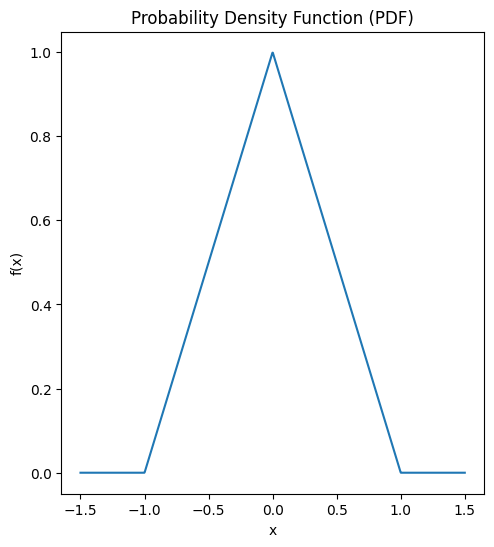

In [9]:
xs = np.linspace(-1.5, 1.5, 1000)

pdf_values = [pdf_1_6(x) for x in xs]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(xs, pdf_values, label='PDF')
plt.title('Probability Density Function (PDF)')
plt.xlabel('x')
plt.ylabel('f(x)')

### b. Define the CDF $F(x)$ and plot it.


#### YOUR SOLUTION HERE:

\begin{gather*}
    F(x) = \int_{-\infty}^{x} f(t) \, dt
\end{gather*}

For $x \leq -1$:
\begin{gather*}
    F(x) = 0
\end{gather*}

For $-1 < x \leq 0$:
\begin{gather*}
    F(x) = \int_{-1}^{x} (1+t) \, dt \\
    F(x) = \left[t + \frac{t^2}{2}\right]_{-1}^{x} \\
    F(x) = x + \frac{x^2}{2} + \frac{1}{2}
\end{gather*}

For $0 < x \leq 1$:
\begin{gather*}
    F(x) = \int_{0}^{x} (1-t) \, dt \\
    F(x) = \left[t - \frac{t^2}{2}\right]_{-1}^{x} \\
    F(x) = 1 + x - \frac{x^2}{2}
\end{gather*}

For $x > 1$:
\[F(x) = 1\]

\begin{gather*}
    F(x) =
    \begin{cases}
    0, & x \leq -1 \\
    x + \frac{x^2}{2} + \frac{1}{2}, & -1 < x \leq 0 \\
    1 + x - \frac{x^2}{2}. & 0 < x \leq 1 \\
    1, & x > 1
    \end{cases}$$
\end{gather*}



In [15]:
#### YOUR SOLUTION HERE:
def cdf_1_6(x):
    if x <= -1:
        return 0
    elif -1 < x <= 0:
        return x + ((x**2) / 2) + 1/2
    elif 0 < x <= 1:
        return 1 + x - ((x**2) / 2)
    else:
        return 1

Text(0, 0.5, 'F(x)')

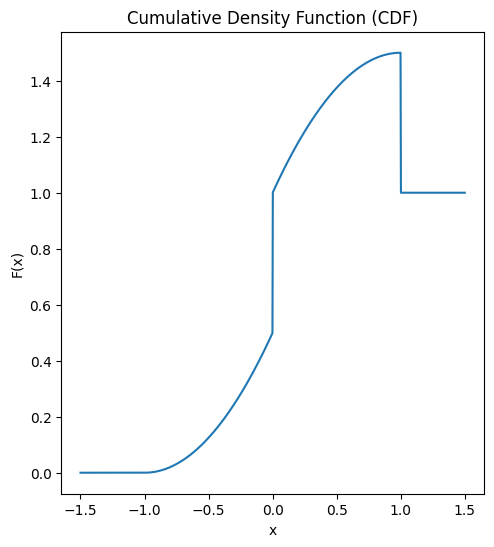

In [16]:
xs = np.linspace(-1.5, 1.5, 1000)

cdf_values = [cdf_1_6(x) for x in xs]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(xs, cdf_values, label='CDF')
plt.title('Cumulative Density Function (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')

### c. Find point $b$ such that:
$p(X > b) = \frac{1}{2}p(X \leq b)$.


#### YOUR SOLUTION HERE

## Question 1.7: Joint Probability
About joint probabilities, prove $\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} p(x,y) \, dxdy = 1$.

#### YOUR SOLUTION HERE:
A joint probability $$ p(x, y) $$ is the probability that 2 different events, in this case x and y, occur simultaneously. \\
The two integrations that are made to the joint probability $$∫{-∞}^{\infty}∫{-∞}^{∞} p(x, y) dx dy $$
mean we're summing over all possible combinations of values of X and Y, weighted by their joint probability \\
The reason that $$∫{-∞}^{\infty}∫{-∞}^{∞} p(x, y) dx dy = 1 $$ is because of the Axiom of total probability, which says that the sum of the probabilities of all possible outcomes of an experiment must equal 1. This means that something has to happen, and the probability of something happening is 100% (or 1 in probability terms).

# Part 2: Distribution Statistics

## Problem 2.1: Expectation & Variance

We consider the coffee consumption of two Computer Science students, Alice and Bob.
Let $X$ and $Y$ be random variables characterizing the number of coffees that Alice and Bob respectively drink in a day.
These are **discrete** random variables.
The possible numbers of daily coffees for each programmer are denoted as $\mathcal{X}$ for Alice and $\mathcal{Y}$ for Bob.
We denote their probability mass functions as $p_X$ and $p_Y$.

We model Alice's consumption as follows:
- $\mathcal{X} = \{0, 1, 2, 3, 4, 5\}$
- $p_X = [0.05, 0.10, 0.40, 0.25, 0.10, 0.10]$

where $p_{X}[x] = p_{X}(x), \quad x \in \mathcal{X}$.

We model Bob's consumption as follows:
- $\mathcal{Y} = \{0, 1, 2, 3, 4, 5, 6, 7\}$
- $p_Y = [0.00, 0.01, 0.09, 0.20, 0.30, 0.20, 0.10, 0.10]$

where $p_{Y}[y] = p_{Y}(y), \quad y \in \mathcal{Y}$.

For instance, the probability that Bob drinks 2 coffees today is $p_{Y}(2) = 0.09$.

### Question 2.1a) Theoretical Questions
#### 1. Give the definition of the expected value of $X$, denoted as $\mathbb{E}[X]$.
#### 2. Show that the expectation is linear, e.g. by showing that from $\mathbb{E}[aX + bY] = a \mathbb{E}[X] + b \mathbb{E}[Y]$ for constants $a$ and $b$.
#### 3. Give the definition of the variance of $X$, denoted as $\mathbb{V}[X]$.
#### 4. Show that $\mathbb{V}[cX] = c^2 \mathbb{V}[X]$ for any constant $c \in \mathbb{R}$.
#### 5. Give the formula connecting the variance $\mathbb{V}[X]$ and the standard deviation $\sigma_X$ of $X$.
#### 6. Considering $\mathcal{X}$ and $p_X$:
    1. Compute the expected value of $X$.
    2. Compute the variance of $X$.
    3. Compute the standard deviation of $X$.

   
#### YOUR SOLUTION HERE:
1.⁠ ⁠The expected value is a measure of the weighted average of the possible outcomes of a random variable, where the weights are the probabilities of each outcome. \
It is calculated as follows \
$$𝔼[X] = ∑_{x ∈ X}  xp(x)$$ \
2.
$$𝔼[X] = ∑_{x ∈ X}  xp(x) \\
𝔼[Y] = ∑_{y ∈ Y}  yp(y) \\
a𝔼[X] + b𝔼[Y] = a∑{x ∈ X}  xp(x) + b∑{y ∈ Y}  yp(y) \\
𝔼[aX + bY] = ∑{x ∈ X}  axp(x) + ∑{y ∈ Y}  byp(y) \\
= a∑{x ∈ X}  xp(x) + b∑{y ∈ Y}  yp(y)\\
𝔼[aX + bY] = a𝔼[X] + b𝔼[Y]
$$
3.
Variance measures the dispersion of a random variable with respect to its mean, showing how far apart the average values are squared. \
It is calculated as follows: \
$$𝕍[X] = 𝔼[(X - 𝔼[X])^2] = 𝔼[X^2] - 𝔼[X]^2  \\ $$
4.
$$c^2𝕍[X] = c^2(𝔼[X^2] - 𝔼[X]^2) \\
𝕍[cX] = 𝔼[c^2X^2] - 𝔼[cX]^2 \\
knowing that a𝔼[X] = 𝔼[aX] \\
𝕍[cX] = c^2𝔼[X^2] - (c𝔼[X])^2 \\
𝕍[cX] = c^2𝔼[X^2] - c^2𝔼[X]^2 \\
𝕍[cX] = c^2(𝔼[X^2] - 𝔼[X]^2) \\
𝕍[cX] = c^2𝕍[X] \\
$$
5.
$$\sqrt{𝔼[(X - 𝔼[X])^2]} = \sqrt{𝔼[X^2]-𝔼[X]^2} \\
$$
6.⁠ ⁠\
  1.
$$
𝔼[X] = (2.55) \\ 𝔼[Y] = (4.29) \\ $$
  2.
  $$
𝕍[X] = (8.05) - (2.55)^2 = 1.5675\\ 𝕍[Y] = (20.47) - (4.29)^2 = 2.0659 \\
$$
  3.
  $$
  σ_X = \sqrt{1.5675} ≃ 1.25\\
  σ_Y = \sqrt{2.0659} ≃ 1.44 \\
  $$


### Question 2.1b) Practical Questions
We instantiate the set of possible values for $X$ and $Y$, and their associated possibilities below using numpy arrays.

In [ ]:
x_values = np.array([0, 1, 2, 3, 4, 5])
x_probabilities = np.array([0.05, 0.10, 0.40, 0.25, 0.10, 0.10]) # NOTE: x_probabilities[i] == probability of x_values[i]
y_values = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y_probabilities = np.array([0.00, 0.01, 0.09, 0.20, 0.30, 0.20, 0.10, 0.10])

# Sanity check, the probabilities must sum to 1 (taking into account numerical precision)
assert np.isclose(x_probabilities.sum(), 1), "Probabilities should sum to 1."
assert np.isclose(y_probabilities.sum(), 1), "Probabilities should sum to 1."

Let us visualize their PMF below.
Based on this visualization, think about which random variable has the highest variance and think about what should roughly be the expected value of each random variable. Check if it is coherent with what you computed for $X$.
(This is not a question, just a first sanity check.)

In [ ]:
# Creating figure with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 4), squeeze=True)

# x
axs[0].bar(x_values, x_probabilities)
axs[0].set_ylabel("p_X(x)")
axs[0].set_xlabel("x")

# y
axs[1].bar(y_values, y_probabilities)
axs[1].set_ylabel("p_Y(y)")
axs[1].set_xlabel("y")

plt.show()

#### 1. Implement the functions `expectation`, `variance` and `standard_deviation` below to respectively compute the expected value, the variance and the standard deviation using the formula you provided.

In [ ]:
def expectation(possible_values: np.ndarray, probabilities: np.ndarray):
    #### YOUR SOLUTION HERE

def variance(possible_values: np.ndarray, probabilities: np.ndarray):
    #### YOUR SOLUTION HERE

def standard_deviation(possible_values: np.ndarray, probabilities: np.ndarray):
    #### YOUR SOLUTION HERE

####  2.   Verify the implementation of the above functions:
   
   a. Does the value of $\mathbb{E}[X]$ you computed previously match the output of your implemented function?
   
   b. Do you find that $\mathbb{E}[Y]$ is roughly what you could have guessed by visualizing the PMF of $Y$?
   
   c. Do you find that $\mathbb{V}[cX] = c^2 \mathbb{V}[X]$ for any value of $c \in \mathbb{R}$?

In [ ]:
#### YOUR SOLUTION HERE

#### YOUR SOLUTION HERE

####  3. Interpret the results:
   
a. Who drinks the most coffee in a day in expectation?

b. Who tends to have the most variable number of daily coffees?

c. How many coffees in total do Alice and Bob drink daily in expectation?

#### YOUR SOLUTION HERE

## Problem 2.2: Kurtosis

A PhD student from IAS is attempting to log into a PC in the robotic lab.
The problem is that this PhD student is used to using an AZERTY keyboard layout, while all PCs in the lab either use a QWERTY or QWERTZ keyboard layout on the login screen.
We would like to study the number of trials this PhD student needs to successfully log in.
We denote as $X$, $Y$, and $Z$ the random variables characterizing the number of attempts it takes for the student to successfully log in when using an AZERTY, a QWERTY, and a QWERTZ layout respectively.
We model these distributions using independent geometric distribution.

The geometric distribution models the occurrence of the first success in an endless series of independent and identically distributed Bernoulli trials.
A Bernoulli trial, also known as a binomial trial, is a random experiment that results in one of two outcomes: "success" or "failure," with the probability of success represented as $p_{success}$.
The probability mass function for a geometric distribution is defined as follows:
$$
p(k) = (1 - p_{success})^{k-1} p_{success}
$$
and it denotes the probability of being successful on the $k$-th trial.

In the described setting, we consider different probabilities of success for each keyboard layout:
- AZERTY, where the success of an attempt is highly probable: $p_{succcess}^{X} = 0.9$,
- QWERTY, where the success of an attempt is somewhat probable: $p_{succcess}^{Y} = 0.5$,
- QWERTZ, where the success of an attempt is quite unlikely: $p_{succcess}^{Z} = 0.2$.

We then note $p_X(k)$ as the probability that the PhD student successfully logs in on its exactly $k$-th attempt and use analogous notations for $p_Y$ and $p_Z$.

### Question 2.2a) Theoretical Questions

#### 1. Give the definition of the kurtosis of a random variable $X$, denoted as $\mathrm{Kurt}[X]$. You can use $\mu$ and $\sigma$ as symbols to denote the expected value and standard deviation of $X$ respectively.

#### 2. Explain in one sentence what the kurtosis measures about a probabilistic distribution.

#### YOUR SOLUTION HERE

### Question 2.2b) Practical Questions

We will rely on the `scipy` package to use the geometric distribution more easily.
We start by instantiating a random variable for each keyboard layout and storing them in a dictionary.

In [ ]:
# Define probability of success at each trial for each keyboard layout
ps_success = {
    "azerty": 0.9,
    "qwerty": 0.5,
    "qwertz": 0.2,
}

# Random variables for each keyboard layout
geoms = {layout: geom(p_success) for layout, p_success in ps_success.items()}

Let us visualize the PMF for each keyboard layout. We plot in linear and logarithmic scale to see *how big* the tail of each distribution is.

In [ ]:
# Compute pmf up to some maximum number of trials
# We assume that higher values have too low probability to be
# significant.
max_num_trials = 15
num_trials = np.arange(0, max_num_trials+1)
pmfs = {layout: g.pmf(num_trials) for layout, g in geoms.items()}

# Plot pmfs
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
for layout, g in geoms.items():
    # linscale
    axs[0].plot(num_trials, pmfs[layout], "o", label=layout)
    axs[0].vlines(num_trials, 0, pmfs[layout])
    # logscale
    axs[1].plot(num_trials, pmfs[layout], "o", label=layout)
    axs[1].set_yscale('log')
axs[0].set_xlabel("Number of trials")
axs[1].set_xlabel("Number of trials")
axs[0].set_ylabel("Probability of success after exactly n trials")
plt.legend()
plt.show()

You should notice that these distributions have different sizes of tail and it is where the kurtosis comes in handy.

#### 1. Implement the function `kurtosis` below to compute the skewness using the formula you provided.

In [ ]:
def kurtosis(possible_values: np.ndarray, probabilities: np.ndarray):
    #### YOUR SOLUTION HERE

#### 2. Compare the kurtosis values your function outputs against the kurtosis values computed by `scipy`.

In [ ]:
#### YOUR SOLUTION HERE

#### 3. Could you have anticipated that the distribution for certain keyboard layouts have higher/lower kurtosis? Explain.
#### 4. In this particular context, give a semantic interpretation to the size of the tail of the distribution.
#### 5. Do you notice how our way of computing the kurtosis underestimates the kurtosis of long-tailed distributions? Provide an explaination by thinking about possible wrong assumptions we have made.

#### YOUR SOLUTION HERE

## Problem 2.3: Median vs. Expectation

Your favorite hard-drive manufacturer is happy to advertise that, in expectation, their hard drives break after only 100,000 hours of usage.
Despite your trust in this company, you decide to investigate a little bit.

You decide to assume that the time to failure/breakage follows an exponential distribution.
Let $T$ be a **continuous** random variable following an exponential distribution, i.e. its probability density function (PDF) is defined as
$$
p_T(t) = \lambda e^{-\lambda t}, \quad \lambda > 0, \quad t \in [0, +\infty).
$$
We consider $T$ to characterize the number of years it takes for a hard drive to break.

### Question 2.3a) Theoretical Questions

#### 1. Give a closed form for the expected value of $T$, denoted as $\mathbb{E}[T]$.
#### 2. Compute the value of $\lambda$ that would yield an average lifetime of 100,000 hours, assuming $\lambda$ is in breakages/second.
#### 3. Give the cumulative density function (CDF) of $T$, denoted as $F_T(t)$, as a function of $p_t$.
#### 4. Give closed-form for $F_T(t)$.
#### 5. Give the definition of the median of a random variable.
#### 6. Compute the median of $T$, denoted $\mathrm{med}_T$ as a function of $\lambda$, and give a numerical value using the value of $\lambda$ you computed before.
#### 7. How does the lifetime of 50\% of the manufacturer's hard drive compare to the advertised expected lifetime?
#### 8. Propose one or more possible issue(s) with our reasoning which might have led to unfair results to your favorite manufacturer.

#### YOUR SOLUTION HERE

## Question 2.3b) Practical Questions
Let us compute the median using Python.
Firstly, we visualize the PMF.


In [ ]:
lmbda = 1e-5
max_t = 1e6
stepsize = 1000 # stepsize should be small for high lambdas
assert lmbda > 0, "The value of lambda should be strictly positive!"

# Discretizing set of ws, pdf and cdf
t = np.linspace(0, max_t, num=int(max_t / stepsize))
p_T = lmbda * np.exp(-lmbda * t)
F_T = np.cumsum(p_T) * stepsize # emulating integration as sum of small rectangles

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
axs[0].plot(t, p_T)
axs[0].set_xlabel("time to failure t [seconds]")
axs[0].set_ylabel("p_T(t)")
axs[1].plot(t, F_T)
axs[1].set_ylabel("F_T(t)")
axs[1].set_xlabel("time to failure t [seconds]")
plt.show()

#### 1. Implement the function `get_theoretical_median` from the formula you derived before.

In [ ]:
def get_med_theoretical():
    #### YOUR SOLUTION HERE

#### 2. Compute the median by leveraging `F_T` that we computed before in the function `get_med_practical`.

In [ ]:
def get_med_practical():
    #### YOUR SOLUTION HERE

#### Public Tests

In [ ]:
med_theoretical = get_med_theoretical()
med_practical = get_med_practical()
print(f"med_theo = {med_theoretical:.0f}, med_prac = {med_practical}")

#### 3. If there is a discrepency between the theoretical and the practical median, how do you explain it? How could you simply fix it?

#### YOUR SOLUTION HERE

## Problem 2.4: Covariance and Correlation

### Question 2.4a) Theoretical Questions
1. Give the definition of the covariance $\mathrm{Cov}[X, Y]$ between two random variables $X$ and $Y$.
2. Show that $\mathbb{V}[X + Y] = \mathbb{V}[X] + \mathbb{V}[Y] + 2 \mathrm{Cov}[X, Y]$. What does this formula become when $X$ and  $Y$ are independent?

#### YOUR SOLUTION HERE

# Part 3: Information Theory

## Question 1: Entropy
You are given an array of integers $X$ with $\forall x \in X: x \geq 0$. Our goal is the calculate the entropy of $X$. Therefore follow the steps below:

### 1.  Implement the function ```get_pmf_1d(X: np.array)``` which outputs the probability mass function for X, so p[x]=relative frequency of x in X. Think about for which indices $x$ p[x] must store a value.

In [ ]:
def get_pmf_1d(X: np.array):
    #### YOUR SOLUTION HERE

#### Public Tests

In [ ]:
test_cases = [(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),np.ones(10) * 0.1),(np.array([0, 2, 2, 5, 8, 1, 6, 0, 8, 9]),np.array([0.2, 0.1, 0.2, 0, 0, 0.1, 0.1, 0, 0.2, 0.1]))]
            

for i, (X, sol) in enumerate(test_cases):
    # Compute DGL step using your function
    pred = get_pmf_1d(X)
    
    test_almost_equal_array(f'{i}', pred, sol)
    test_almost_equal(f'Sum {i}', np.sum(pred), 1.0)

### 2. Implement the function ```compute_entropy(p: np.array)``` which computes the entropy $H(X)$ of the probability mass function $p$ using get_mf_1d

In [ ]:
def compute_entropy(X: np.array):
    #### YOUR SOLUTION HERE

#### Public Tests

In [ ]:
test_cases = [
    ((np.array([1, 2, 3, 4])), 2),
    ((np.array([0, 0, 0, 0])), 0),
]

for i, (X, sol) in enumerate(test_cases):
    # Compute DGL step using your function
    pred = compute_entropy(X)
    test_almost_equal(f'{i}', pred, sol)

## Question 2: Compute for a Binary erasure channel the Channel Capacity (Theory question)
In this question compute the channel capacity of a binary erasure channel with erasure probability $p_e = 0.25$ and put your result as latex code in the underlying markdown cell. Furthermore, what are the probabilities of the input $P(x)$ for which the channel capacity is achieved?

The channel capacity is given by: 

$$C=\max _{p(x)} \mathrm{I}(X ; Y)$$

*Hint:* Think about the probabilities of the input P(x). How are the input probabilities related to the max operator?

#### YOUR SOLUTION HERE

## Question 3: Mutual Information
Now you are given two arrays of integers $X$ and $Y$, where all elements are greater than or equal to 0 (cf. Question 1). Compute the mutual information $I(X;Y)$ between the two arrays.


### 1. Implement the function ```get_pmf_2d(X: np.array, Y: np.array)``` which outputs the probability mass function for the joint probability of X and Y, so p[x, y]=relative frequency of x and y.

In [ ]:
def get_pmf_2d(X: np.array, Y: np.array):
    #### YOUR SOLUTION HERE

#### Public Tests

In [ ]:
test_cases = [((np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),np.eye(10,10) * 0.1),((np.array([0, 1, 2, 3]),np.array([3, 2, 2,1 ])),np.array([[0, 0, 0, 0.25], [0, 0, 0.25, 0], [0, 0, 0.25, 0], [0, 0.25, 0, 0]]))]
            

for i, (X, sol) in enumerate(test_cases):
    # Compute DGL step using your function
    pred = get_pmf_2d(*X)
    test_almost_equal_array(f'{i}', pred, sol)
    test_almost_equal(f'Sum {i}', np.sum(pred), 1.0)

### 2. Implement the function ```compute_mutual_information(X: np.array, Y: np.array)``` which computes the mutual information $I(X;Y)$ between the two arrays.

In [ ]:
def compute_mutual_information(X: np.array, Y: np.array):
    #### YOUR SOLUTION HERE

#### Public Tests

In [ ]:
test_cases = [
    ((np.array([1, 2, 3, 4]), np.array([0, 1, 2, 3])), 1.5),
    ((np.array([1, 1, 2, 1]), np.array([1, 1, 1, 2])), -0.08496),
]

# X = np.random.choice(4, 10000, p=[0.25, 0.25, 0.25, 0.25])


for i, ((X, Y), sol) in enumerate(test_cases):
    # Compute DGL step using your function
    pred = compute_mutual_information(X, Y)
    test_almost_equal(f'{i}', pred, sol)

## Question 4: Average Conditional Entropy of an Image

Images can be represented in pixel matrices $M \in \mathcal{R}^{h\times w \times c}$, where $h$ is the height and $w$ is the width of the image, and $c$ is the channel dimension.
In black-and-white images, $M[m,n]$ stores the pixel color of the $m$-th row and $n$-th column of the image, which is 1 for white and 0 for black.
In RGB arrays you will instead have a 3D value for each pixel, with values between 0 and 255, but in this exercise, we focus on black-and-white images for simplicity.
Storing such images can take up lots of storage, especially for high-resolution pictures.
Instead, many image storage formats, such as JPEG, use a lossy compression of the images.
The idea we consider here is that if we know the neighboring pixels of a pixel at position $(m,n)$, this information can allow us to predict what is the pixel value at $(m,n)$, e.g., using maximum likelihood.
How good this approximation is can be estimated with the *average conditional entropy* of this relationship, which we will compute in this exercise.

### 1. Complete the function `show_image` which is given a 2D pixel matrix of a black-and-white image as described before, and displays the image in a matplotlib plot.

In [ ]:
def show_image(img: np.array, title: str=''):
    #### YOUR SOLUTION HERE

#### Public Test

In [ ]:
np.random.seed(1)
height, width = 100, 100 
bw_image = np.random.choice([0, 1], size=(height, width)) #, p=[0.01, 0.99])
show_image(bw_image, title='Random BW Image')

### 2. It will help us to define a 'code' for the neighbors of a pixel, which we do as follows:
Looking at a pixel, we start with the upper left neighbor and go around the image clockwise to get the remaining neighbors (s. Example).
The sequence of 0's and 1's that we encounter can be viewed as a binary number, which we can transform into an integer to obtain a decimal code of the neighbors.
Compute the 'neighbor code' for a pixel in the function ```get_neighbor_code```.

*Note:* Make sure that your function checks that the pixel index is not at the borders of the image (because not all neighbors are available), and if not returns the neighbor code -1.
In practice, one could define a padding for such pixels, but we will only consider pixels that are properly inside the image.

**Example:** In the plot above, the sequence is '10101110', which yields the neighbor code 174.

In [ ]:
def get_neighbor_code(pixels: np.array, m: int, n: int):
    #### YOUR SOLUTION HERE

#### Public Tests

In [ ]:
test_cases = [
    ((np.array([
        [1, 0, 1], 
        [0, -1, 0], 
        [1, 1, 1]
    ]), 1, 1), 174),
    ((np.array([
        [1, 0, 1], 
        [0, -1, 0], 
        [1, 1, 1]
    ]), 0, 1), -1),
]

# X = np.random.choice(4, 10000, p=[0.25, 0.25, 0.25, 0.25])


for i, ((X, m, n), sol) in enumerate(test_cases):
    # Compute DGL step using your function
    pred = get_neighbor_code(X, m, n)
    test_almost_equal(f'{i}', pred, sol)

### 3. Now implement two functions:

i. ```compute_px```computes a 1D probability distribution where p[x]=probability of seeing x in the whole image array, with $x\in\{0,1\}$. 

ii. ```compute_pxy```computes the joint probability of the pixels and their neighbors. Here we will use the neighbor code from 4b) to translate the neighbors of a pixel into a proper index for our array.  Therefore p[x,y] will hold the joint probability of seeing the middle pixel $x$ and the neighbor code $y$.

*Note:* As described, we only consider pixels that are not at the border, so only consider these pixels for your computations.

*Note:* Both distributions should have the proper shape. Think about what this shape must be for p[x,y] (think about the range of y values possible).

*Hint:* The functions ```get_pmf_1d``` and ```get_pmf_2d```may help you.

In [ ]:
def compute_px(pixels: np.array):
    #### YOUR SOLUTION HERE

In [ ]:
def compute_pxy(pixels: np.array):
    #### YOUR SOLUTION HERE

#### Public Tests

In [ ]:
test_cases = []
i1 = np.array([
        [1, 0, 1], 
        [0, 1, 0], 
        [1, 1, 1]
])
p_x1 = np.array([0, 1])
p_xy1 = np.zeros((2, 256))
p_xy1[1, 174] = 1

test_cases.append(
    (i1, (p_x1, p_xy1))
)


for i, (X, (s1, s2)) in enumerate(test_cases):
    # Compute DGL step using your function
    pred1 = compute_px(X)
    pred2 = compute_pxy(X)
    test_almost_equal(f'{i}', pred, sol)

### 4. Using the defined functions, now compute the average conditional entropy of the pixels and their neighbors. Implement your solution in the function ```compute_average_conditional_entropy```.

In [ ]:
def compute_cond_entropy(pixels: np.array):
    #### YOUR SOLUTION HERE

#### Public Tests

In [ ]:
np.random.seed(1)
height, width = 100, 100  # Example size, can be adjusted
# Generate a random black-and-white image (binary values 0 and 1)
bw_image = np.random.choice([0, 1], size=(height, width))
test_cases = [
    (bw_image, 7.96487)
]

for i, (X, sol) in enumerate(test_cases):
    # Compute DGL step using your function
    pred = compute_cond_entropy(X)
    test_almost_equal(f'{i}', pred, sol)

## Question 5: Compute the KL divergence between these two distributions in both directions.

In this task, we want to compute the KL divergence between two distributions. To compute the KL divergence we first need 2 distributions that we wanna compare. In our case, we take the following 2 distributions

$
X_1 \sim \mathcal{N}(0, 1)
$

$
X_2 \sim \mathcal{N}(5, 6)
$


### 1. PDF of a normal distribution

First, we want to be able to compute the probability of a value $x$ for the given 2 distributions. Therefore implement the function ```normal_pdf(x: float, mean: float, std: float)``` which computes the probability of values $x$ (array of values) for a normal distribution with mean $mean$ and standard deviation $std$.

In [ ]:
def normal_pdf(x:np.ndarray, mu:float, sigma:float):
    #### YOUR SOLUTION HERE

#### Public Tests

In [ ]:
test_cases = [(np.array([0.0,-1.0,1.0,1.5,-1.5]), np.array([0.39894228, 0.24197072, 0.24197072, 0.1295176,  0.1295176])),(np.array([0.0,-1.0,1.0,1.5,-1.5]),[0.12447389, 0.11602242, 0.13147063, 0.13432575, 0.11135996])]

mu = [0,4]
sigma = [1,8]
y = normal_pdf(np.array([0.0,-1.0,1.0,1.5,-1.5]), 4, 8)
for i, (X, sol) in enumerate(test_cases):
    # Compute DGL step using your function
    pred = normal_pdf(X,mu[i],sigma[i])
    test_almost_equal_array(f'{i}', pred, sol)

If the function is implemented correctly, you will see a plot containting both normal distributions below.

In [ ]:
x  = np.linspace(-30, 30, 10000)

y1 = normal_pdf(x, 0, 1)
y2 = normal_pdf(x, 5, 6)

plt.plot(x, y1, label='mu=0, sigma=1')
plt.plot(x, y2, label='mu=5, sigma=6')
plt.legend()

### 2. Implement the function ```kl_divergence(mean1: float, sigma1: float, mean2: float, sigma2: float)``` which computes the KL divergence between the two normal distributions with the given parameters.
The general formula for the KL divergence is $D_{\mathrm{KL}}[p: q]=\int p \log \frac{p}{q} \mathrm{~d} \mu$ where $p$ and $q$ are the two distributions we want to compare.
In our case, we have 2 normal distributions which has the advantage that a closed-form solution for the KL divergence exists. The KL divergence between two normal distributions is given by:
$D_{\text{KL}}(p \,||\, q) = \log\left(\frac{\sigma_q}{\sigma_p}\right) + \frac{\sigma_p^2 + (\mu_p - \mu_q)^2}{2 \sigma_q^2} - \frac{1}{2}$

In [ ]:
def kl_divergence(mu1,sigma1,mu2,sigma2):
    #### YOUR SOLUTION HERE

#### Public Tests

In [ ]:
test_cases = [((0,1,0,1), 0.0),((9,2,3,8),2.568147180559945),((12,4,0,1),72.80685281944005)]


for i, (X, sol) in enumerate(test_cases):
    # Compute DGL step using your function
    pred = kl_divergence(*X)
    test_almost_equal(f'{i}', pred, sol)

### 3. Now compute the KL divergence for the two given normal distributions.

Hereby compute the KL-divergence once where x1 corresponds to p and x2 corresponds to q and once where x1 corresponds to q and x2 corresponds to p. Save the results in the variables kl1 and kl2 and print them. What do you observe and why? Answer this question in the cell below.

In [ ]:
kl1 = kl_divergence(0,1,5,6)
kl2 = kl_divergence(5,6,0,1)

print(f"KL-divergence between X1 and X2: {kl1}")
print(f"KL-divergence between X2 and X1: {kl2}")

#### YOUR SOLUTION HERE